In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement
iris = pd.read_csv("iris_dataset.csv")

In [5]:
# On renomme les colonnes
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]


In [6]:
# On supprime l'identifiant des iris
del iris["id"]


In [7]:
# On supprime les individus contenant au moins une valeur manquante
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} individus, iris_dna : {} individus".format(len(iris),len(iris_dna)))


iris : 150 individus, iris_dna : 146 individus


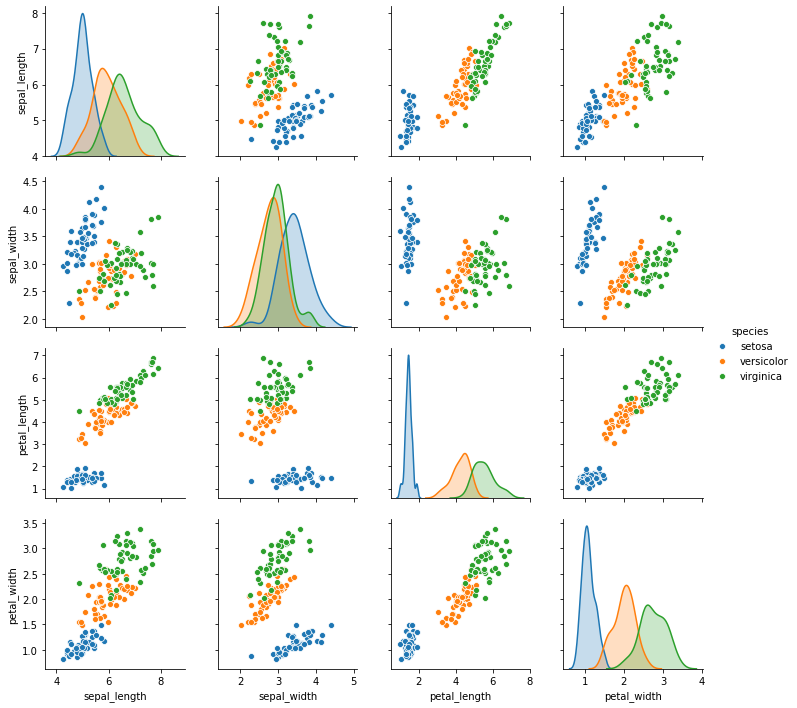

In [8]:
# Affichage des diagrammes de dispersion
sns.pairplot(iris_dna,hue="species")
plt.show()

In [9]:
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]

In [10]:
import scipy.stats as st
import numpy as np

In [11]:
st.pearsonr(iris_dna["petal_width"],iris_dna["petal_length"])[0]

0.9418817573025173

In [12]:
st.pearsonr(iris_dna["sepal_width"],iris_dna["petal_width"])[0]

-0.24797130615784596

In [13]:
import statsmodels.api as sm

Y = iris_dna['petal_width']
X = iris_dna[['petal_length']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_length'],result.params['intercept']

result.params

petal_length    0.385994
intercept       0.509268
dtype: float64

In [14]:
Y = iris_setosa['sepal_width']
X = iris_setosa[['petal_width']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_width'],result.params['intercept']

result.params

petal_width    1.787501
intercept      1.459327
dtype: float64

In [15]:
Y = iris_virginica['sepal_width']
X = iris_virginica[['petal_width']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_width'],result.params['intercept']

result.params

petal_width    0.699251
intercept      1.037743
dtype: float64

In [16]:
Y = iris_versicolor['sepal_width']
X = iris_versicolor[['petal_width']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['petal_width'],result.params['intercept']

result.params

petal_width    0.973570
intercept      0.809489
dtype: float64